In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:

block_size = 3 # context length
X, Y = [], []
for w in words:
    
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .
charlotte
... ----> c
..c ----> h
.ch ----> a
cha ----> r
har ----> l
arl ----> o
rlo ----> t
lot ----> t
ott ----> e
tte ----> .
mia
... ----> m
..m ----> i
.mi ----> a
mia ----> .
amelia
... ----> a
..a ----> m
.am ----> e
ame ----> l
mel ----> i
eli ----> a
lia ----> .
harper
... ----> h
..h ----> a
.ha ----> r
har ----> p
arp ----> e
rpe ----> r
per ----> .
evelyn
... ----> e
..e ----> v
.ev ----> e
eve ----> l
vel ----> y
ely ----> n
lyn ----> .
abigail
... ----> a
..a ----> b
.ab ----> i
abi ----> g
big ----> a
iga ----> i
gai ----> l
ail ----> .
emily
... ----> e
..e ---

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
emb = C[X] # Char embedding lookup-table
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # Calculate logits of model
# softmax into negative log loss
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean() (This code is equivalent to the Pytorch below)
loss = F.cross_entropy(logits, Y)
loss

NameError: name 'C' is not defined

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
logits.shape

NameError: name 'logits' is not defined

In [9]:
torch.cat(torch.unbind(emb, 1), 1).shape # Each embedding has a rowsize of 2, so the shape is 6 (2 * 3)
# equivalent to emb.view(32, 6) because of the way that tensors are processed by pytorch

NameError: name 'emb' is not defined

In [39]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre # We do this to give an exponential increase to our learning rates instead of a linear dist through 0.001 and 1 
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

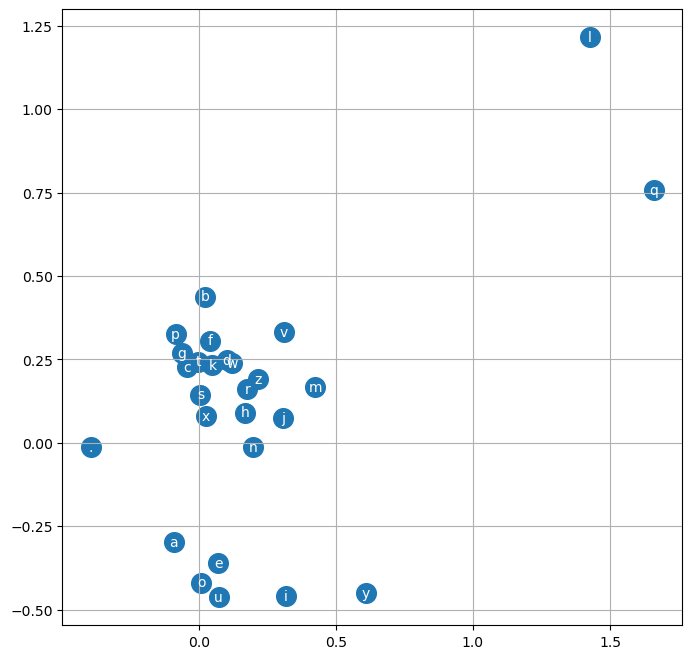

In [106]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

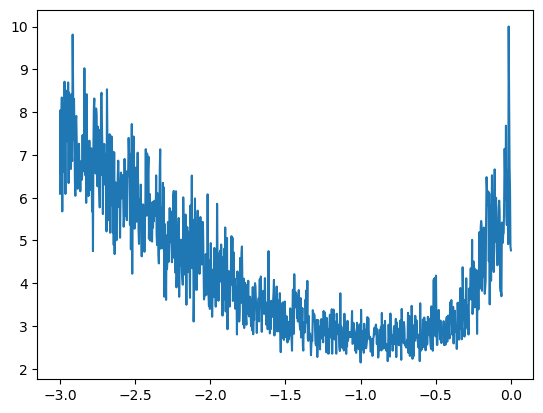

In [45]:
plt.plot(lri, lossi)

In [65]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [139]:
# build the dataset
block_size = 5 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 5]) torch.Size([182441])
torch.Size([22902, 5]) torch.Size([22902])
torch.Size([22803, 5]) torch.Size([22803])


In [137]:
embedding_depth = 10

C = torch.randn((27, embedding_depth)) # Embedding lookup table
# input layer
inputs = embedding_depth * block_size
W1 = torch.randn((inputs, 250)) # inputs calculated by 3 * 2, refer to emb shape
b1 = torch.randn(250) 
# Output layer
W2 = torch.randn((250, 27))
b2 = torch.randn(27)
# Parameters
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [138]:
lri = []
lossi = []
stepi = []

In [130]:
steps = 200000

for i in range(steps):
    # minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # Forward Pass
    emb = C[Xtr[ix]] # Char embedding lookup-table
    h = torch.tanh(emb.view(-1, inputs) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # Calculate logits of model
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i <= 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

#print(loss.item())

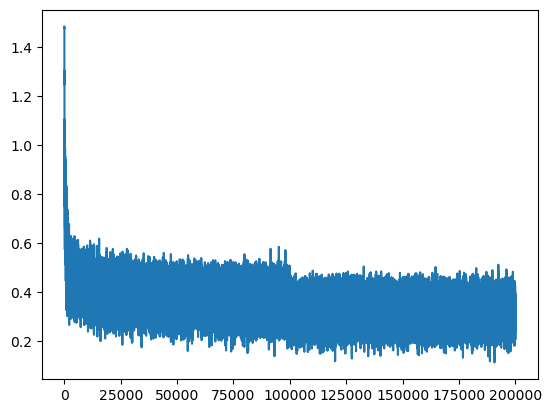

In [131]:
plt.plot(stepi, lossi)

In [132]:
# Training loss
emb = C[Xdev] # Char embedding lookup-table
h = torch.tanh(emb.view(-1, inputs) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # Calculate logits of model
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1747, grad_fn=<NllLossBackward0>)

In [133]:
# Validation Loss
emb = C[Xdev] # Char embedding lookup-table
h = torch.tanh(emb.view(-1, inputs) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # Calculate logits of model
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1747, grad_fn=<NllLossBackward0>)

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%